# Introduction to neural network classification with TensorFlow

A classification is where you try to classify something as one thing or another 

A few types of classification problems :
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03,
                    random_state=42)

In [2]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Visualize the data to understand this difficult data

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


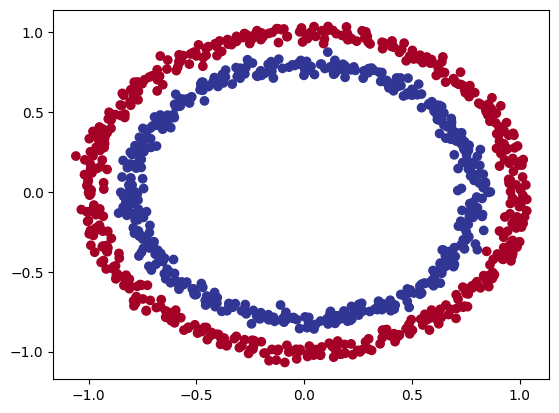

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input and Output Shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [8]:
# How many total samples
len(X), len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model     
4. Evaluate the model
5. Tweak
6. Evaluate

In [10]:
# Import TensorFlow
import tensorflow as tf
tf.__version__

'2.18.0'

In [11]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4769 - loss: 5.9558   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 754us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 667us/step - accuracy: 0.4830 - loss: 8.3336
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.4830 - loss: 8.3336


In [12]:
# Improve the model by training it longer
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.4955 - loss: 8.1322 


[8.059046745300293, 0.5]

Add extra layer as model is currently getting ~50% accuracy which is similar to guess work

In [13]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 867us/step - accuracy: 0.4760 - loss: 0.6932


[0.6932255625724792, 0.4659999907016754]

In [15]:
circles["label"].value_counts()

label
1    500
0    500
Name: count, dtype: int64

## Improving the model

1. Create a model - add more layers or increase the number of hidden units withing a layer.
2. Compiling a model - choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - fit model for more epochs(leave it training for longer).

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1.Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 neurons in the first layer
    tf.keras.layers.Dense(10), # 10 units in the second layer
    tf.keras.layers.Dense(1)
])

# 2. Compile
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - accuracy: 0.4996 - loss: 0.6918


[0.6940721869468689, 0.48100000619888306]

In [18]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

Create a function `plot_decision_boundary()` to visualize the model's predictions, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as a line between zones (where each unique class falls).

In [19]:
import numpy as np

In [20]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model prediciting on X.
    1. https://cs231n.github.io/neural-networks-case-study/
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X value (going to make predictions on this)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions 
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step
doing binary classification


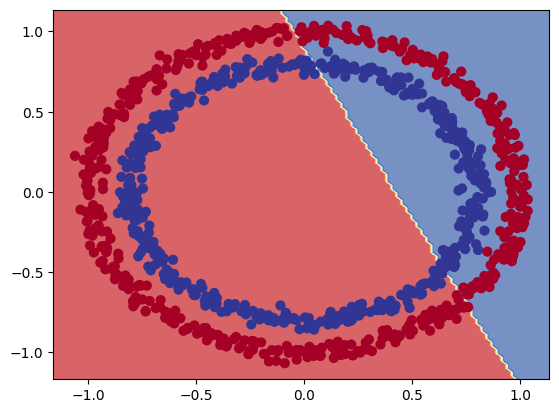

In [21]:
# Checkn out the predictions our model is making 
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
# Let's see if this model can be used for a regression problem

tf.random.set_seed(42)


# Create some regression data
X_regression = tf.range(0, 1000, 5, dtype=tf.float32)
y_regression = tf.range(100, 1100, 5, dtype=tf.float32) # y = X + 100


# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

x_reg_train_exp = tf.expand_dims(X_reg_train, axis=-1)

# Fit our model to the regression data
model_3.fit(x_reg_train_exp, y_reg_train, epochs=100)

Epoch 1/100


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=True
  • mask=None

The model was compiled for a binary classification problem.

But it is working now on a regression problem, change the model to suit the data

In [26]:
# Setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model (this time with regression-specific loss function)
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

X_reg_train_expanded = tf.expand_dims(X_reg_train, axis=-1)

# 3. Fit the model
model_3.fit(X_reg_train_expanded, y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 434.7792 - mae: 434.7792
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 329.5222 - mae: 329.5222 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 223.3272 - mae: 223.3272 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 114.6719 - mae: 114.6719 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46.7770 - mae: 46.7770 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 78.9077 - mae: 78.9077 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 69.8202 - mae: 69.8202 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.2158 - mae: 45.2158 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47.7646 - mae: 47.7646 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.6343 - mae: 40.6343 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.6248 - mae: 42.6248 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 41.8758 - mae: 41.8758 
Epoch 13/100
5/5 ━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


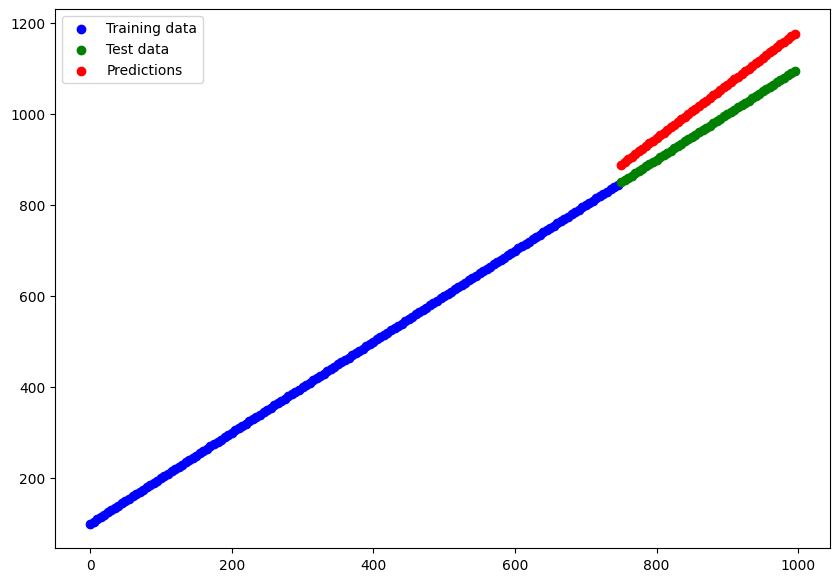

In [27]:
# Make predictions with trained model
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend()

## The missing piece: Non-linearity

In [28]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 793us/step - accuracy: 0.4830 - loss: 4.5093 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step - accuracy: 0.4830 - loss: 4.2439
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 713us/step - accuracy: 0.4830 - loss: 4.0170
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.4830 - loss: 3.9166
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.4830 - loss: 3.7793
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.4830 - loss: 3.6220
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.4830 - loss: 3.4093
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.4830 - loss: 3.1651
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 730us/step - accuracy: 0.4830 - loss: 2.7886
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 912us/step - accuracy: 0.4830 - loss: 2.6650
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.4830 - loss: 2.0487
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

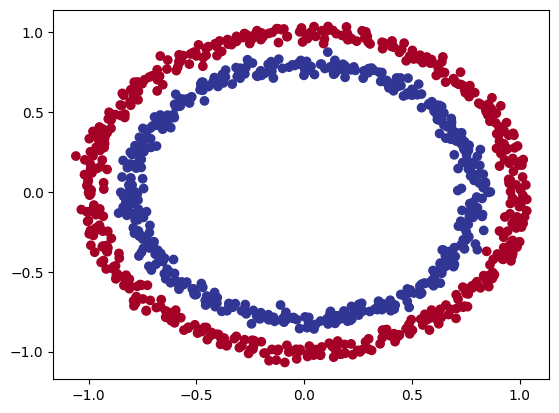

In [29]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step
doing binary classification


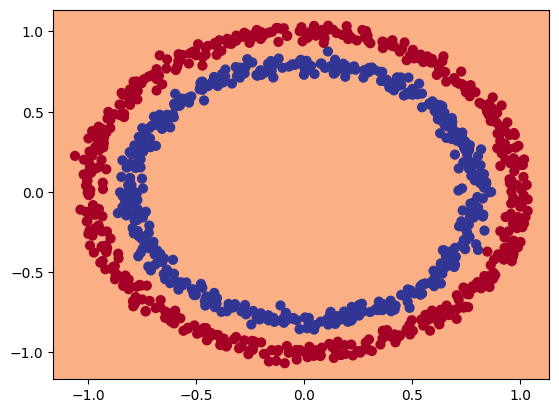

In [30]:
# Check the decision boundary for latest model
plot_decision_boundary(model_4,
                       X=X,
                       y=y)

Build neural network with a non-linear activation function

In [31]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 774us/step - accuracy: 0.4522 - loss: 6.8378 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.4537 - loss: 6.7889
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - accuracy: 0.4535 - loss: 6.7431
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - accuracy: 0.4535 - loss: 6.7085
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.4535 - loss: 6.6753
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.4546 - loss: 6.6083
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - accuracy: 0.4546 - loss: 6.5586
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.4546 - loss: 6.5533
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.4540 - loss: 6.5124
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - accuracy: 0.4523 - loss: 6.4983
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - accuracy: 0.4519 - loss: 6.4732
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [32]:
# Multi-layer neural network

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, 4 neurons, ReLU activation
    tf.keras.layers.Dense(4, activation="relu"), # hidden layer 2, 4 neurons, ReLU activation
    tf.keras.layers.Dense(1) # output layer
])

# 2. Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4830 - loss: 4.3529   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 765us/step - accuracy: 0.4830 - loss: 2.8473
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.4804 - loss: 2.2937
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - accuracy: 0.4355 - loss: 1.7589
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.4167 - loss: 1.3236
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 901us/step - accuracy: 0.4371 - loss: 1.2667
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.4484 - loss: 1.2258
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4616 - loss: 1.1922 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.4674 - loss: 1.1631
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.4709 - loss: 1.1387
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - accuracy: 0.4710 - loss: 1.1173
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [33]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 801us/step - accuracy: 0.6436 - loss: 0.6340


[0.638633131980896, 0.6190000176429749]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step
doing binary classification


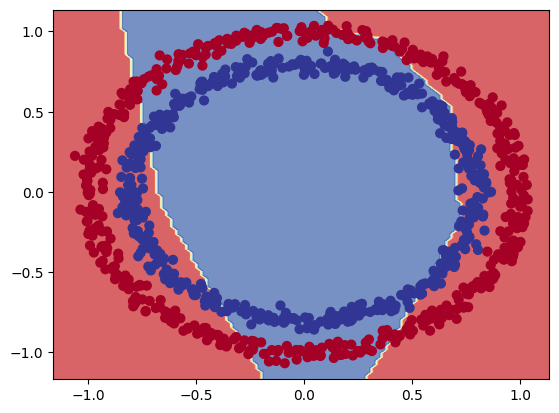

In [34]:
# How does model predictions look
plot_decision_boundary(model_6, X, y)

In [35]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.5224 - loss: 0.6935 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.5254 - loss: 0.6919
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - accuracy: 0.5200 - loss: 0.6909
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.5211 - loss: 0.6901
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.5274 - loss: 0.6893
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 811us/step - accuracy: 0.5198 - loss: 0.6886
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.5231 - loss: 0.6879
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.5258 - loss: 0.6872
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - accuracy: 0.5280 - loss: 0.6866
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.5258 - loss: 0.6859
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - accuracy: 0.5478 - loss: 0.6852
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [36]:
# 4. Evaluate the model
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - accuracy: 0.8195 - loss: 0.4541


[0.43996021151542664, 0.8309999704360962]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step
doing binary classification


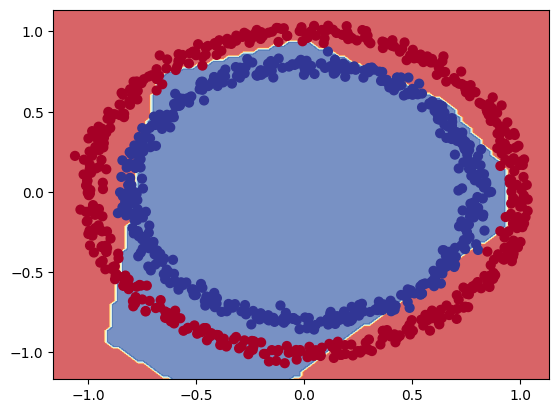

In [37]:
# Visualize the metrics
plot_decision_boundary(model_7, X, y)

The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

In [38]:
# Create a toy tensor (similar to data earlier passed to the models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

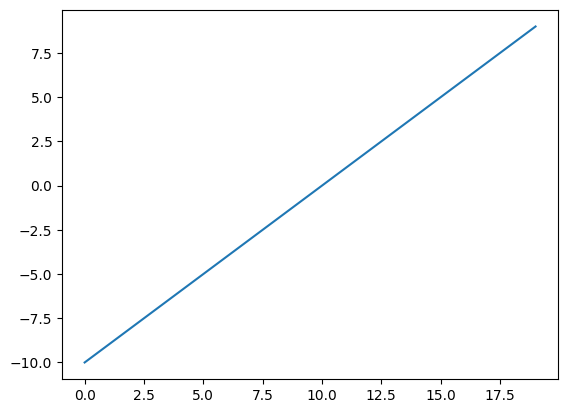

In [39]:
# Visualize the toy tensor
plt.plot(A)

In [40]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
    return 1 / (1 + tf.exp(-x)) 

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

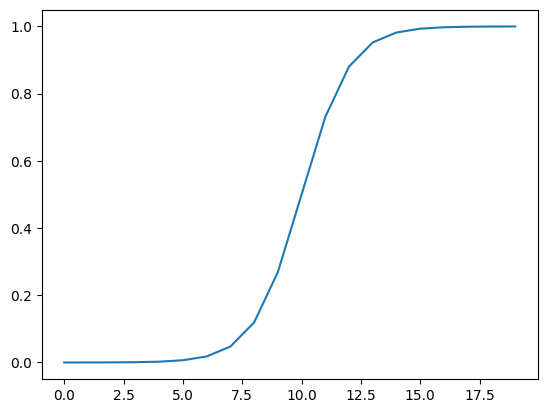

In [41]:
# Plot our toy tensor transformed by sigmoid 
plt.plot(sigmoid(A))

In [42]:
# Let's recreate the relu function
def relu(x):
    return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

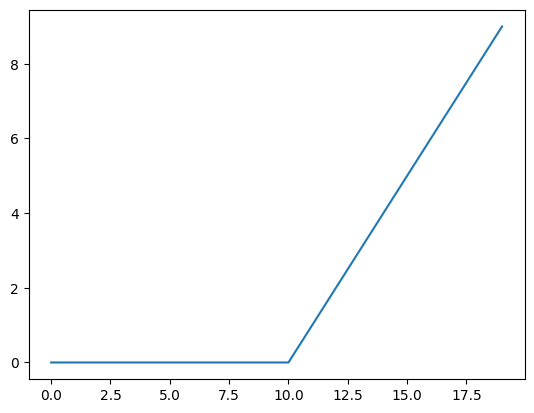

In [43]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

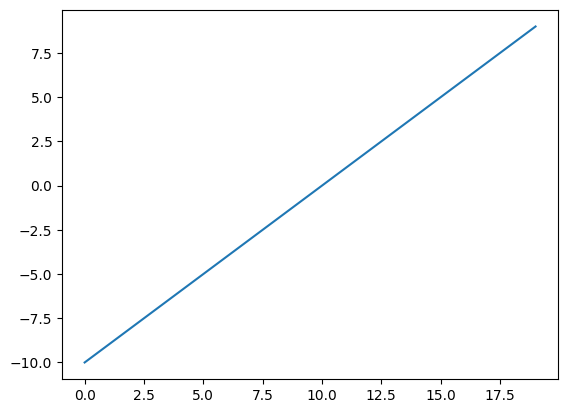

In [44]:
plt.plot(A)

In [45]:
# Let's try linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

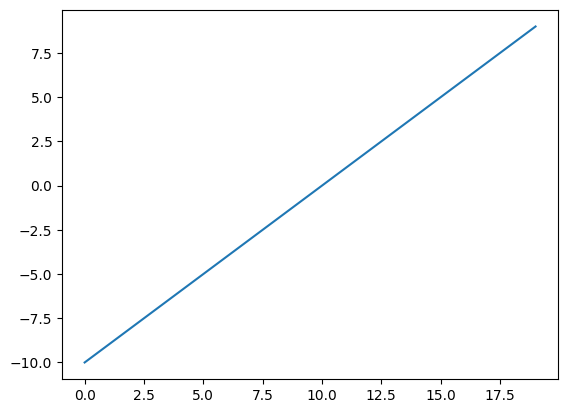

In [46]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [47]:
## Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and Improving Classification

So far the model has been trained and tested on same dataset...

However, in machine learning this is basically a sin.

So, create a training and test set.

In [48]:
# Check the number of examples
len(X)

1000

In [49]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [50]:
# Recreate a model to fit on the training data and evaluate on the testing data 

# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as model 7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5032 - loss: 0.6922
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 715us/step - accuracy: 0.5397 - loss: 0.6883
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.5680 - loss: 0.6831
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.5809 - loss: 0.6757
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - accuracy: 0.6145 - loss: 0.6647
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.6733 - loss: 0.6482
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step - accuracy: 0.6920 - loss: 0.6176
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - accuracy: 0.6956 - loss: 0.5847
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7353 - loss: 0.5495
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - accuracy: 0.7741 - loss: 0.5094
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step - accuracy: 0.8295 - loss: 0.4653
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step -

In [51]:
# 4. Evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9501 - loss: 0.1565  


[0.14578858017921448, 0.9549999833106995]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step
doing binary classification


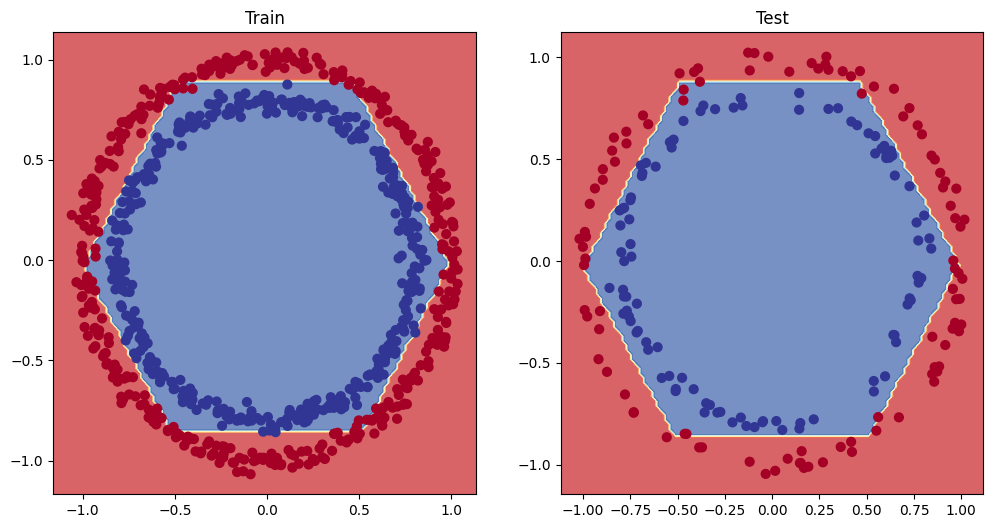

In [52]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

## Plot the loss (or training) curves

In [53]:
history.history

{'accuracy': [0.5087500214576721,
  0.5337499976158142,
  0.5525000095367432,
  0.5649999976158142,
  0.6087499856948853,
  0.6662499904632568,
  0.6899999976158142,
  0.7037500143051147,
  0.7425000071525574,
  0.7787500023841858,
  0.8299999833106995,
  0.8737499713897705,
  0.9150000214576721,
  0.9424999952316284,
  0.956250011920929,
  0.9599999785423279,
  0.9624999761581421,
  0.9637500047683716,
  0.9674999713897705,
  0.96875,
  0.9700000286102295,
  0.96875,
  0.9712499976158142,
  0.9725000262260437,
  0.9712499976158142],
 'loss': [0.6918607950210571,
  0.6884727478027344,
  0.6835294961929321,
  0.6757487654685974,
  0.6636756062507629,
  0.6440062522888184,
  0.6116068363189697,
  0.5777294039726257,
  0.5393455624580383,
  0.49850380420684814,
  0.44963929057121277,
  0.39552533626556396,
  0.3489738404750824,
  0.3064717948436737,
  0.2720377743244171,
  0.24440403282642365,
  0.22269214689731598,
  0.2051045298576355,
  0.18845805525779724,
  0.175531804561615,
  0.165

In [54]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,accuracy,loss
0,0.50875,0.691861
1,0.53375,0.688473
2,0.55250,0.683529
3,0.56500,0.675749
4,0.60875,0.663676
5,0.66625,0.644006
6,0.69000,0.611607
7,0.70375,0.577729
8,0.74250,0.539346
9,0.77875,0.498504


Text(0.5, 1.0, 'Model_8 Loss Curves')

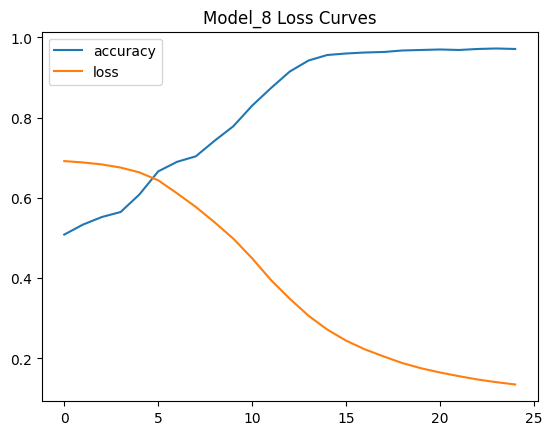

In [55]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 Loss Curves")

For many problems, the loss function going down means the model is improving (the predictions it's making are getting closer to the ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) following steps are used:
* A learning rate **callback** - callback can be thought of as an extra piece of functionality, which can be added *while* its training.
* Another model
* A modified loss curves plot.

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.5097 - loss: 0.6954 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 766us/step - accuracy: 0.5050 - loss: 0.6953 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.5043 - loss: 0.6951 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - accuracy: 0.5008 - loss: 0.6950 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - accuracy: 0.5021 - loss: 0.6948 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - accuracy: 0.5021 - loss: 0.6946 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 705us/step - accuracy: 0.4990 - loss: 0.6944 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 752us/step - accuracy: 0.4977 - loss: 0.6942 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - accuracy: 0.4972 - loss: 

<Axes: xlabel='epochs'>

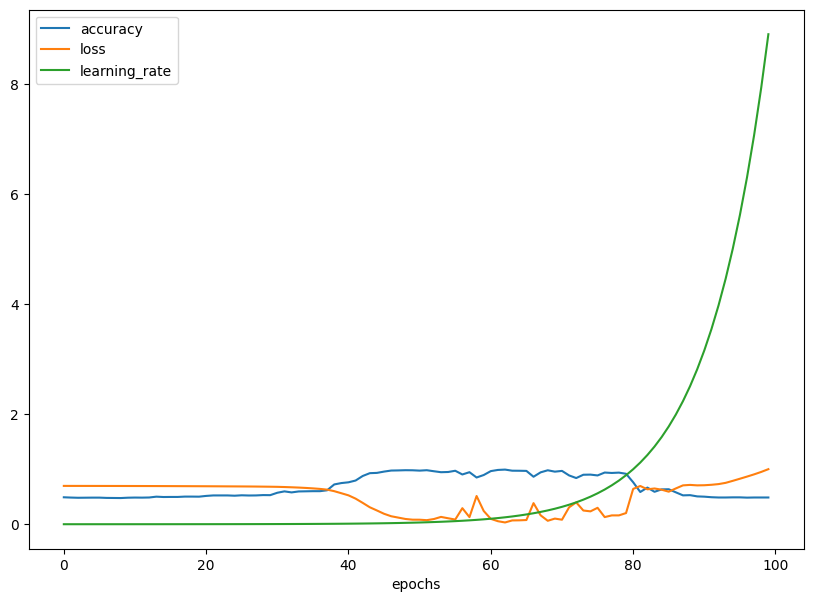

In [57]:
# Checkout the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0.5, 1.0, 'Learning Rate vs Loss')

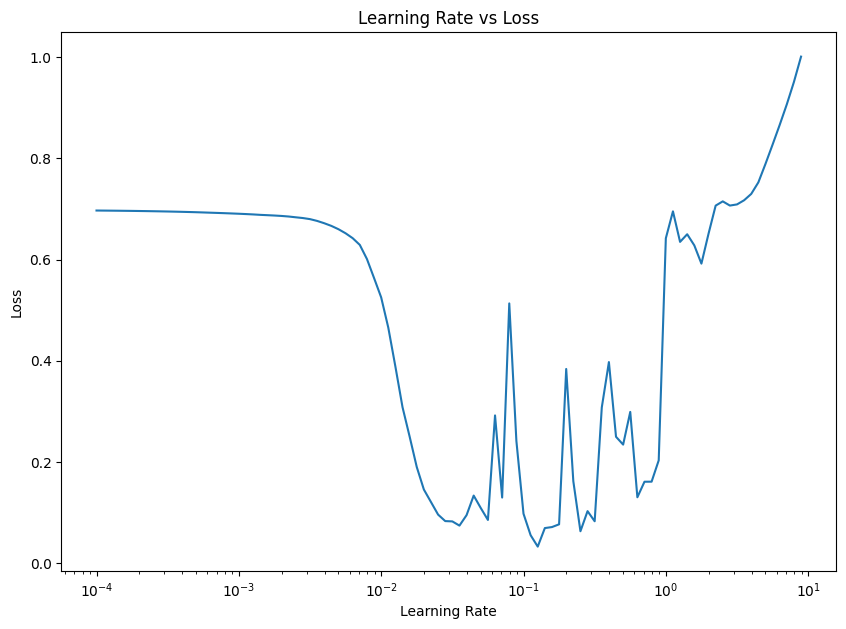

In [58]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")

In [59]:
len(lrs)

100

In [60]:
# Example of other typical learning rate values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [61]:
# Try using a higher *ideal* learning rate with the same model

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 927us/step - accuracy: 0.4765 - loss: 0.6955 
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.5018 - loss: 0.6881
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.5354 - loss: 0.6822
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - accuracy: 0.5514 - loss: 0.6666
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - accuracy: 0.6299 - loss: 0.6452
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.6931 - loss: 0.6030
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.7348 - loss: 0.5477
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - accuracy: 0.7890 - loss: 0.4966
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.8022 - loss: 0.4553
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8206 - loss: 0.4294
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.8342 - loss: 0.4102
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/ste

In [62]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - accuracy: 0.8758 - loss: 0.3375


[0.35621410608291626, 0.8600000143051147]

In [63]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9501 - loss: 0.1565 


[0.14578858017921448, 0.9549999833106995]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 680us/step
doing binary classification


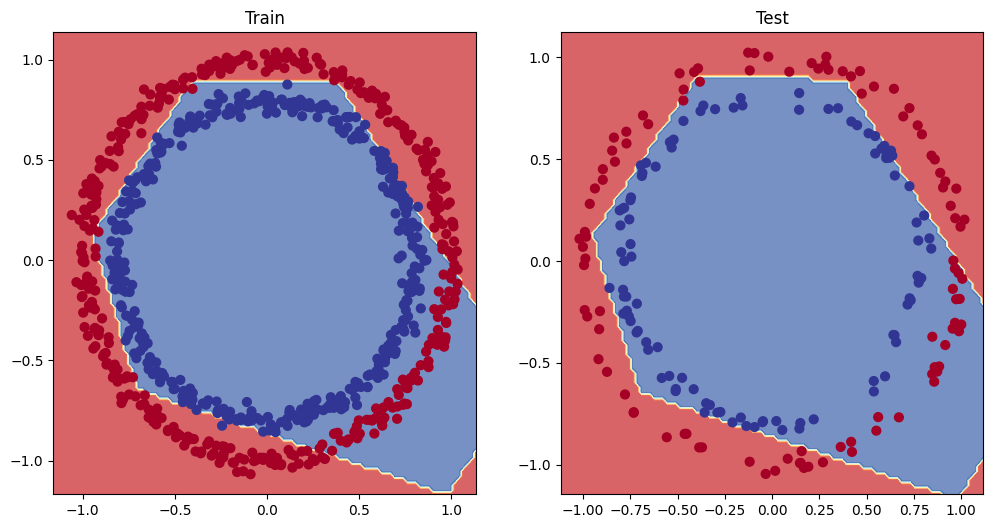

In [73]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, y=y_test)
plt.show()

## More classification evaluation metrics

Alongside visualizing models results as much as possible, there are handful of other classification evaluation methods & metrics:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion Matrix
* Classification report (from scikit-learn) - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

In [74]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8758 - loss: 0.3375 
Model loss on the test set: 0.35621410608291626
Model accuracy on the test set: 86.00%


How about a Confusion matrix

In [76]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_10.predict(X_test)


# Create confusion matrix
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [77]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [78]:
y_preds[:10]

array([[0.630574  ],
       [0.82061416],
       [0.82061416],
       [0.82061416],
       [0.20504172],
       [0.18426667],
       [0.70458007],
       [0.23197876],
       [0.82061416],
       [0.00278835]], dtype=float32)

The predictions array has come out in **prediction probablility** form... the standard output from the sigmoid (or softmax) activation functions.

In [79]:
# Convert prediction probablilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [80]:
# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[75, 26],
       [ 2, 97]], dtype=int64)

TypeError: 'Text' object is not callable

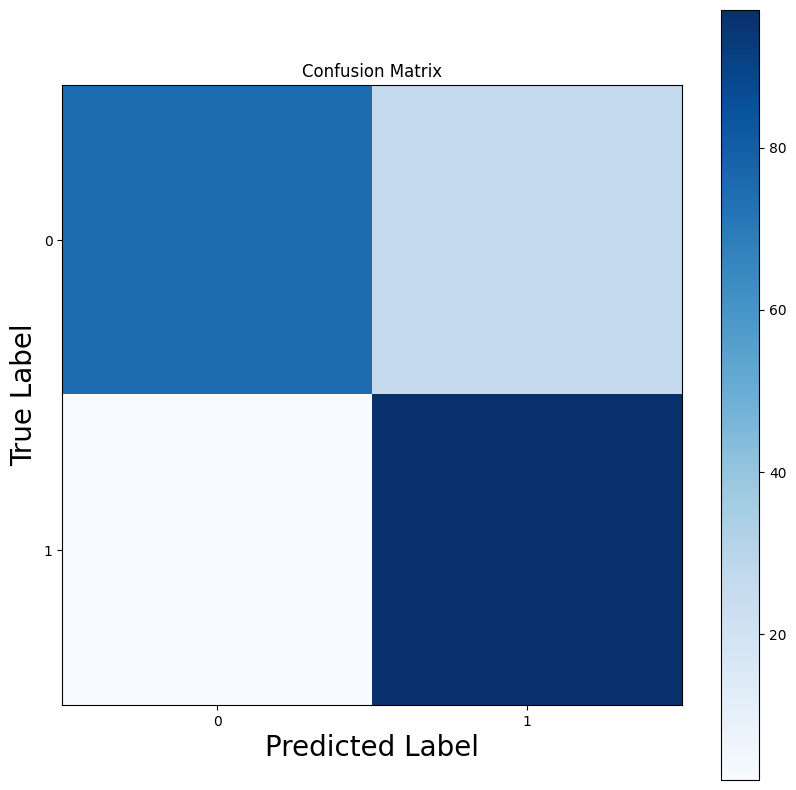

In [81]:
# Note: the confusion matrix is a remix of scikit-learn's plot_confusion_matrix

import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize the confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title(set_size=20)

# Set the threshold for different colors
threshold = (cm.max() + cm.min()) / 2

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[0])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=15)

In [82]:
cm_norm

array([[0.74257426, 0.25742574],
       [0.02020202, 0.97979798]])

In [83]:
cm.shape[0]

2

# Working with a larger example (multiclass classification)

When we have more than two classes as an option, it's known as **multi-class classification**.
* This means if we have 3 different classes, it's multi-class classification.
* It also means if we have 100 different classes, it's multi-class classification.

Classify images of different items of clothing for multi-class classification

In [84]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [85]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [86]:
# Check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

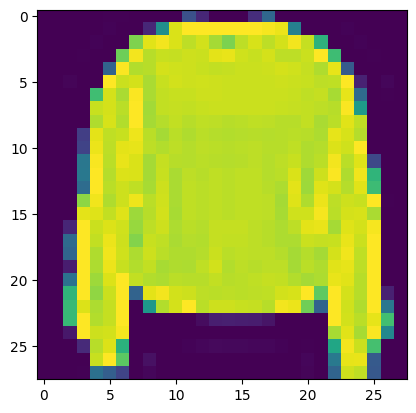

In [87]:
# Plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [88]:
# Check out the sample's label
train_labels[7]

2

In [89]:
# Create a small list to index training labels so they're human redable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

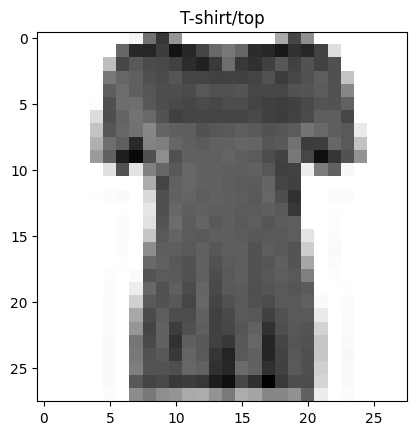

In [90]:
# Plot an example image and its label
index_of_choice = 10
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

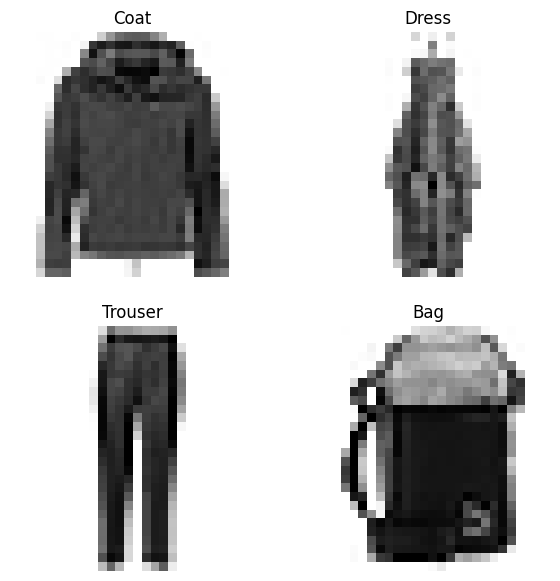

In [91]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

## Building a multi-class classification model

For multi-class classification model, similar architecture to binary classifiers can be used, however, a few modifications are required:
* Input shape = 28 x 28 (the shape of one image)
* Output shape  = 10 (one per class of clothing )
* Loss function = tf.keras.losses.CategoricalCrossentropy()
    * If labels are one-hot encoded, use CategoricalCrossentropy()
    * If labels are integer form use SparseCategoricalCrossentropy()
* Output layer activation = Softmax (not sigmoid)

In [92]:
train_data[0].shape

(28, 28)

In [93]:
len(class_names)

10

In [94]:
# Data needs to be flattened (from 28*28 to None, 784)
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28))])
flatten_model.output_shape

C:\Users\agarw\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [95]:
tf.one_hot(train_labels[:10], depth=10)

<tf.Tensor: shape=(10, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

In [96]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                tf.one_hot(train_labels, depth=10), 
                                epochs=10, 
                                validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 902us/step - accuracy: 0.1923 - loss: 2.6740 - val_accuracy: 0.2821 - val_loss: 1.7201
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 904us/step - accuracy: 0.2693 - loss: 1.6939 - val_accuracy: 0.3159 - val_loss: 1.6190
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2958 - loss: 1.6120 - val_accuracy: 0.3167 - val_loss: 1.5664
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 800us/step - accuracy: 0.3095 - loss: 1.5687 - val_accuracy: 0.3383 - val_loss: 1.5289
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.3181 - loss: 1.5426 - val_accuracy: 0.3483 - val_loss: 1.5117
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 785us/step - accuracy: 0.3240 - loss: 1.5237 - val_accuracy: 0.3547 - val_loss: 1.5012
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 786us/step - accuracy: 0.3297 - loss: 1.5128 - val_accuracy: 0.3512 - val_loss: 1.5049
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 801us/step - accuracy: 0.3312 - l

In [98]:
# Check the model summary
model_11.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [99]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensors they try to find patterns between 0 and 1.

In [100]:
# Training and testing data can be between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# Check the min and max value of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [101]:
# Now the data is normalized, let's build a model to find patterns in it

# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='sigmoid')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels, 
                            epochs=10, 
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 874us/step - accuracy: 0.1689 - loss: 2.0755 - val_accuracy: 0.2478 - val_loss: 1.7947
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 773us/step - accuracy: 0.2719 - loss: 1.7488 - val_accuracy: 0.3393 - val_loss: 1.6056
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.3491 - loss: 1.5614 - val_accuracy: 0.3519 - val_loss: 1.4988
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.3666 - loss: 1.4747 - val_accuracy: 0.3593 - val_loss: 1.4514
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 795us/step - accuracy: 0.3761 - loss: 1.4331 - val_accuracy: 0.3636 - val_loss: 1.4241
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.3838 - loss: 1.4044 - val_accuracy: 0.3774 - val_loss: 1.3977
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 814us/step - accuracy: 0.3939 - loss: 1.3822 - val_accuracy: 0.3895 - val_loss: 1.3836
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step - accuracy: 0.4023 -

> **Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1).

<Axes: title={'center': 'Normalized data'}>

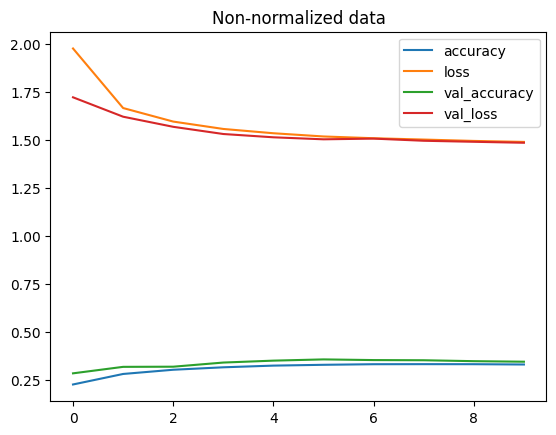

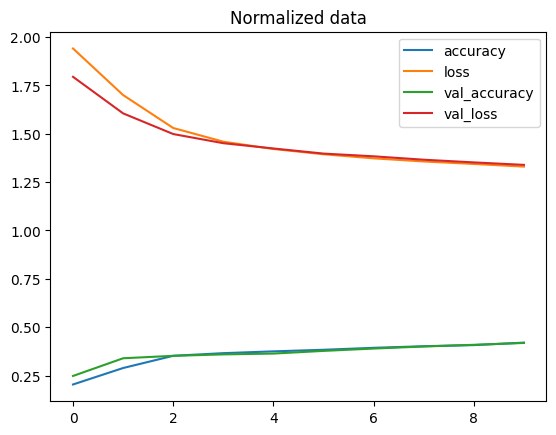

In [102]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data")

> **Note:** The same model with even *slighlty* different data can produce *dramatically* different results. When comparing models, it's important to make sure they are compared on the same criteria (e.g. same architecture but different data or same data but different architecture).

## Finding the ideal learning rate

In [103]:
# Set the random seed
tf.random.set_seed(42)

# Create model
model_13 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# Fit the model
find_lr_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               callbacks=[lr_scheduler],
                               validation_data=(test_data_norm, test_labels))

Epoch 1/40


C:\Users\agarw\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 903us/step - accuracy: 0.3145 - loss: 1.7685 - val_accuracy: 0.6144 - val_loss: 1.1472 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.6933 - loss: 0.9220 - val_accuracy: 0.7680 - val_loss: 0.6833 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.7750 - loss: 0.6584 - val_accuracy: 0.7844 - val_loss: 0.6370 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.7898 - loss: 0.6214 - val_accuracy: 0.7925 - val_loss: 0.6174 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 796us/step - accuracy: 0.7953 - loss: 0.6021 - val_accuracy: 0.7947 - val_loss: 0.6081 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 793us/step - accuracy: 0.7994 - loss: 0.5897 - val_accuracy: 0.7972 - val_loss: 0.6013 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 816us/step - accuracy: 0.8018 

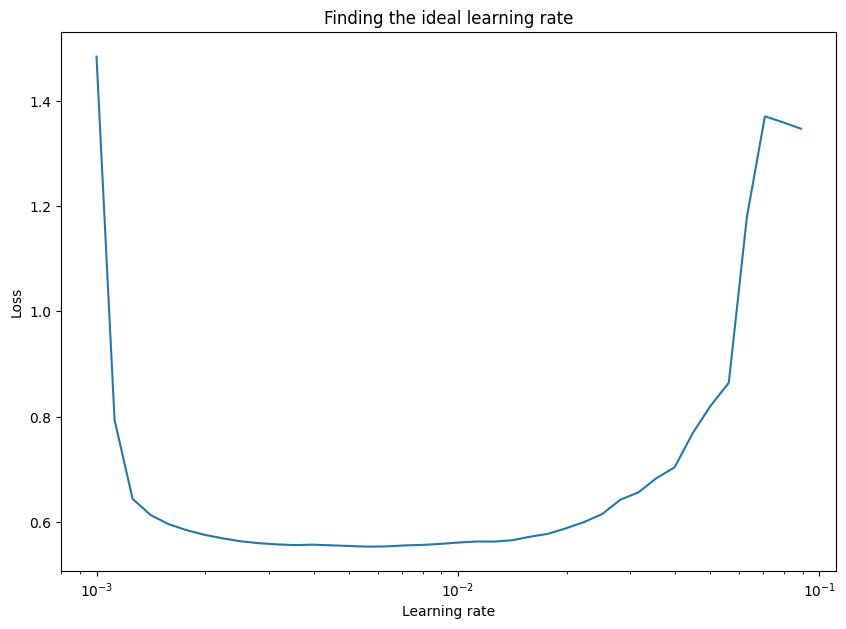

In [104]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [114]:
# Let's refit a model with the ideal learning rate  

# Set random seed
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# Create the model
model_14 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

# Fit the model
history_14 = model_14.fit(train_data_norm,
                           train_labels, 
                           epochs=20, 
                           validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.3785 - loss: 1.6569 - val_accuracy: 0.6112 - val_loss: 0.9645
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 810us/step - accuracy: 0.6300 - loss: 0.9173 - val_accuracy: 0.6559 - val_loss: 0.8440
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.6680 - loss: 0.8211 - val_accuracy: 0.6867 - val_loss: 0.7963
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 864us/step - accuracy: 0.6962 - loss: 0.7775 - val_accuracy: 0.7053 - val_loss: 0.7658
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 788us/step - accuracy: 0.7223 - loss: 0.7452 - val_accuracy: 0.7350 - val_loss: 0.7321
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 786us/step - accuracy: 0.7452 - loss: 0.7060 - val_accuracy: 0.7513 - val_loss: 0.6858
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - accuracy: 0.7648 - loss: 0.6556 - val_accuracy: 0.7607 - val_loss: 0.6582
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.7754 -

## Evaluating multi-class classification model

To evaluate multi-class classification model:
* Evaluate its performance using other classification metrics (such as confusion matrix)
* Assess some of its predictions (through visualizations)
* Improve its results (by training it for longer or changing the architecture)
* Save and export it for use in an application

In [131]:
# Create a confusion matrix 
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
    # Create the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]  # normalize the confusion matrix
    n_classes = cm.shape[0]

    # Prettify the matrix
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes
    else:
        labels = np.arange(n_classes)

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted Label",
           ylabel="True Label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position('bottom')

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_fontsize(text_size)
    plt.xticks(fontsize=text_size)
    plt.yticks(fontsize=text_size)

    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f})",
        horizontalalignment="center",
        color="white" if cm[i, j] > threshold else "black",
        size=text_size)


In [107]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [115]:
# Make some predictions with the model
y_probs = model_14.predict(test_data_norm) # probs is short for "prediction probabilities"

# View the first 5 predicitions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step


array([[2.7396863e-10, 2.1248206e-10, 2.6633091e-09, 1.4358648e-06,
        3.1199707e-10, 1.3428873e-01, 6.6768591e-10, 2.0691253e-01,
        1.0685473e-03, 6.5772873e-01],
       [3.9661634e-03, 3.3279724e-05, 8.8429296e-01, 6.3728017e-04,
        6.0873982e-02, 5.2265712e-04, 3.8476322e-02, 6.6504313e-04,
        4.8825415e-05, 1.0483473e-02],
       [9.1565998e-06, 9.9843580e-01, 5.6188734e-13, 1.5550188e-03,
        1.5573138e-13, 5.1595395e-18, 1.5240295e-09, 6.9621962e-19,
        2.4378785e-13, 1.3965188e-16],
       [4.2148142e-07, 9.9800402e-01, 2.8917228e-15, 1.9955311e-03,
        6.6301808e-17, 6.4267863e-15, 7.3855236e-12, 6.2739595e-15,
        4.8338915e-12, 2.8840625e-14],
       [9.4940364e-02, 4.7460772e-04, 3.0560291e-01, 1.3004051e-02,
        1.1986176e-01, 1.2588367e-04, 4.6542117e-01, 1.0948140e-06,
        5.5302179e-04, 1.5099149e-05]], dtype=float32)

> **Note:** Make predictions on the same kind of data model was trained on (e.g. if the model was trained on normalized data, the predictions will be made on normalized data).

In [109]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [119]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([2.7396863e-10, 2.1248206e-10, 2.6633091e-09, 1.4358648e-06,
        3.1199707e-10, 1.3428873e-01, 6.6768591e-10, 2.0691253e-01,
        1.0685473e-03, 6.5772873e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [117]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [121]:
# Convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

In [122]:
test_labels[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [124]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                y_pred=y_preds)

array([[723,   6,  14,  79,  14,   2, 154,   0,   8,   0],
       [ 10, 931,   4,  34,   5,   0,  16,   0,   0,   0],
       [ 14,   0, 711,   9, 163,   0,  98,   0,   1,   4],
       [ 31,  25,   4, 809,  28,   1,  82,   0,  19,   1],
       [  0,   0, 158,  33, 702,   2,  84,   0,  21,   0],
       [  0,   0,   4,   0,   0, 894,   0,  67,   6,  29],
       [146,   0, 133,  52, 207,   0, 447,   0,  15,   0],
       [  0,   0,   0,   0,   0,  33,   0, 941,   0,  26],
       [  1,   0,   4,  13,  53,  13,  18,   3, 892,   3],
       [  0,   0,   0,   1,   1,  12,   2,  68,   2, 914]], dtype=int64)

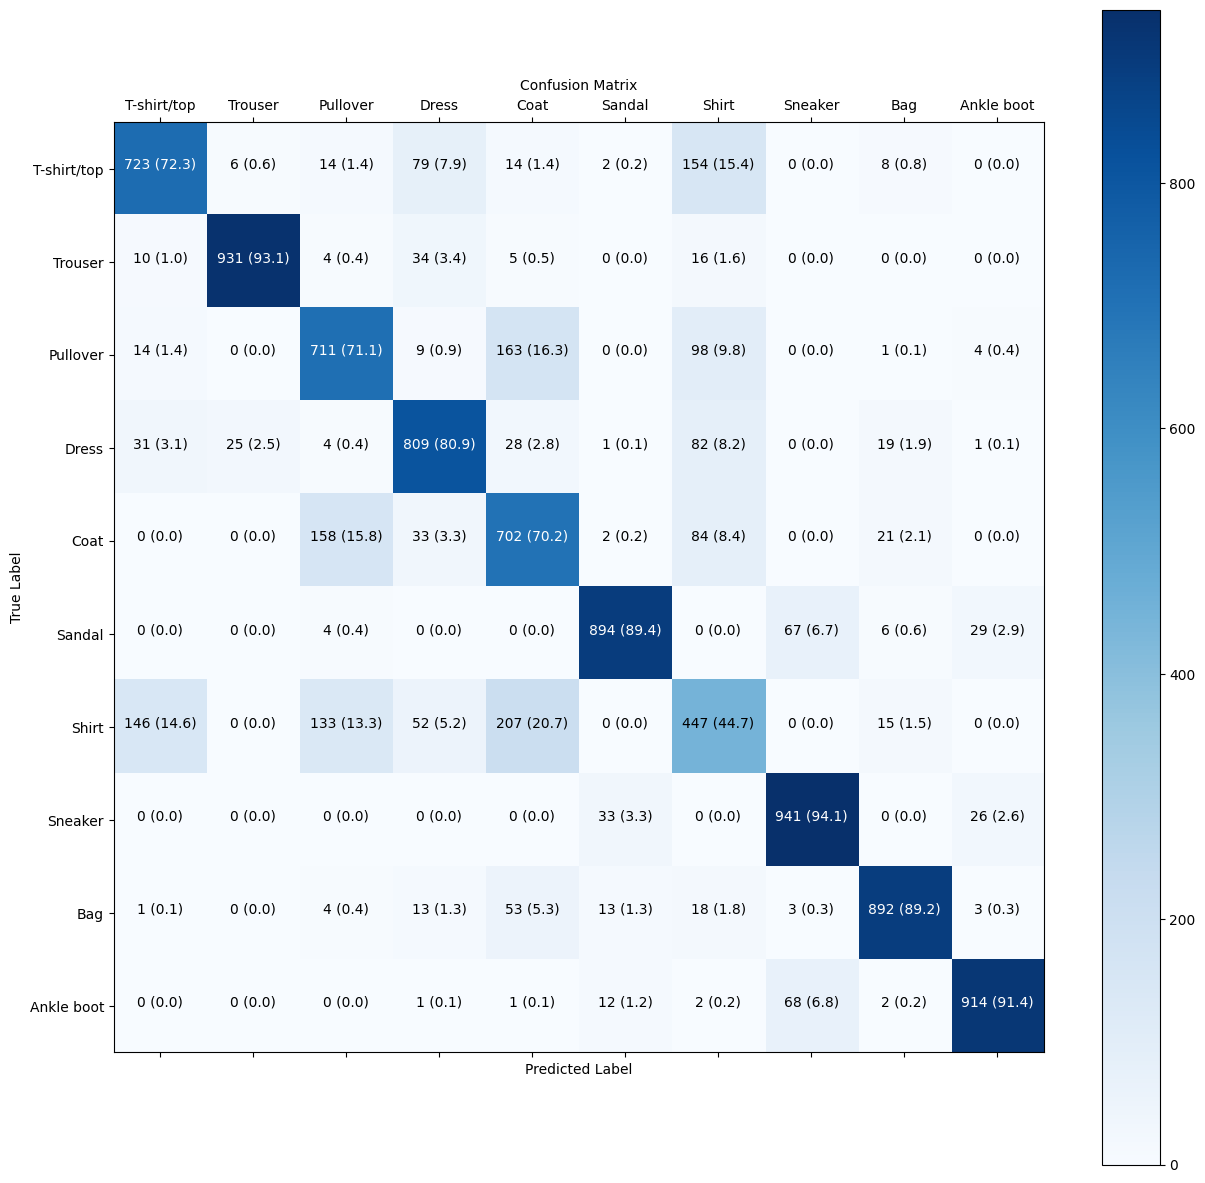

In [132]:
# Graphical confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10) 

> **Note:** Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of the model

Create a function for:
* Plot a random image
* Make a prediction on said image
* Label the plot with the truth label & the predicted label

In [137]:
import random

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plot it and labels it with a prediction and truth label.
    """
    # Set up random integer
    i = random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images[i]
    pred_probs = model_14.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of titles depending on if the prediction is right or wrong 
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_label),
                                                      color=color) # Set the color to green or red based on if prediction is right or wrong

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


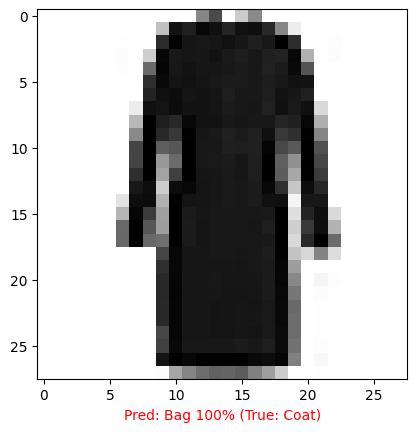

In [150]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

## What patterns is the model learning?

In [151]:
# Find the layers of most recent used model
model_14.layers

[<Flatten name=flatten_8, built=True>,
 <Dense name=dense_47, built=True>,
 <Dense name=dense_48, built=True>,
 <Dense name=dense_49, built=True>]

In [152]:
# Extract a particular layer
model_14.layers[1]

<Dense name=dense_47, built=True>

In [155]:
# Get the patterns of a layer in the network# Get the patterns of a layer in the network
weights, biases = model_14.layers[1].get_weights()

# Shapes
weights, weights.shape

(array([[ 0.5392157 ,  0.05349896,  0.44045472, -0.49600327],
        [ 0.34032142,  0.01661781,  0.20147327, -0.5481086 ],
        [ 0.49667907, -0.63206786,  0.7885539 , -1.0640397 ],
        ...,
        [ 0.5588417 ,  0.09278872, -0.17900354, -0.40515816],
        [-0.18254538,  0.03449052, -0.27373698,  0.23638877],
        [-0.64501613, -0.19445413,  0.7906926 , -0.31947175]],
       dtype=float32),
 (784, 4))

In [156]:
model_14.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

Check out the bias vector 

In [157]:
# Bias and biases shapes
biases, biases.shape

(array([ 2.2278266 ,  1.08122   , -0.47180253, -0.73375726], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these are paired with a weights matrix .

The bias vector also get initialized as zeros (at least in the case of a Tensorflow Dense Layer).

The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

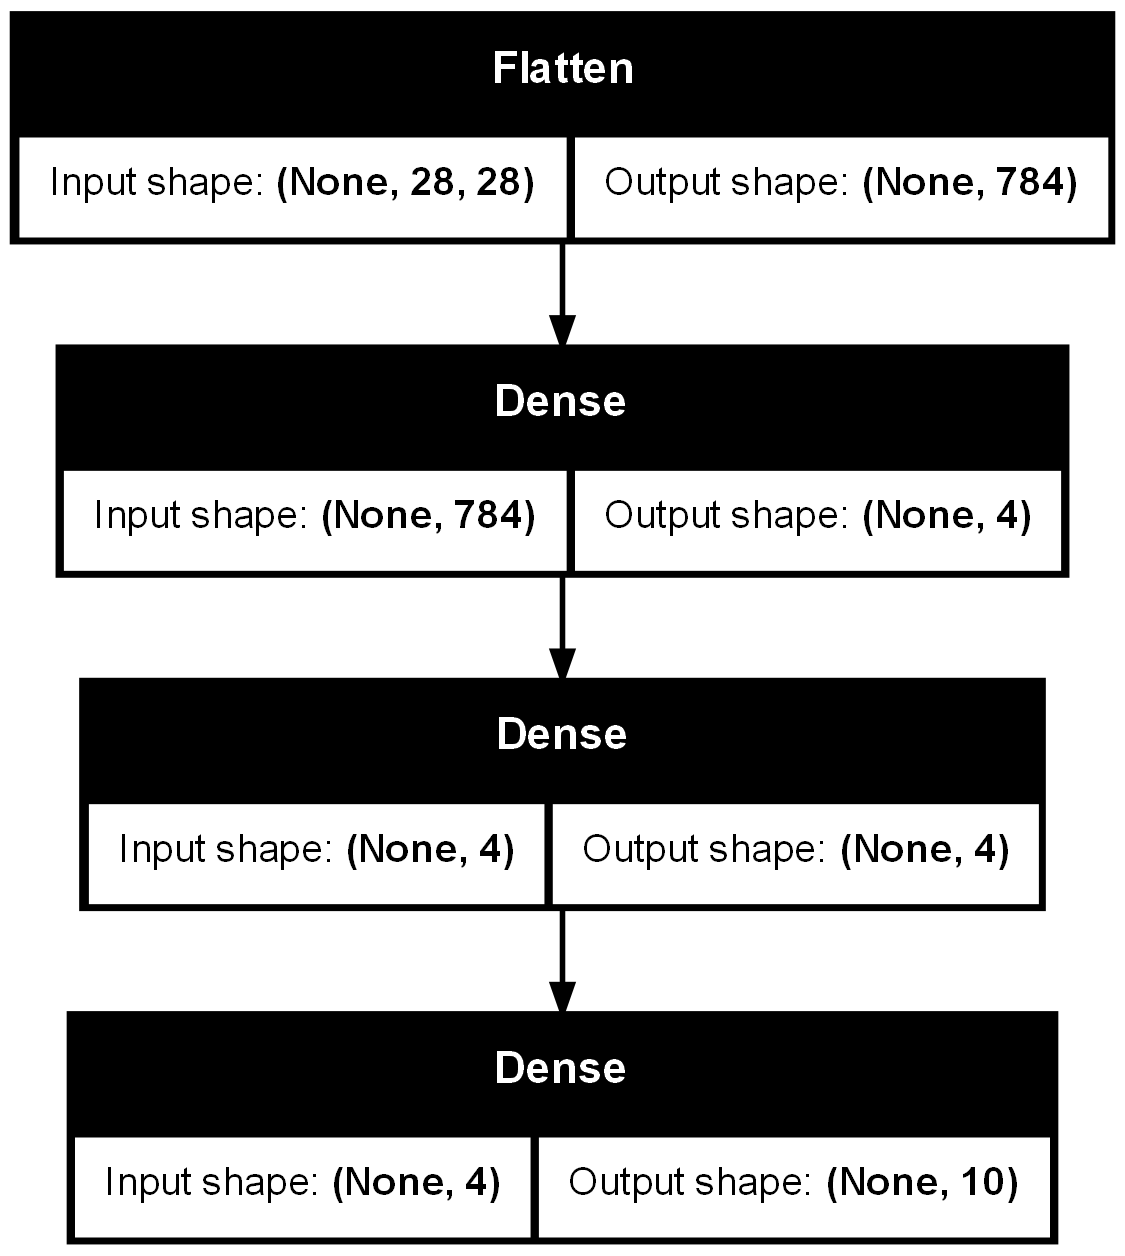

In [158]:
# Another way of viewing the deep learning models
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)